# Day 14

### Part 2

In [ ]:
import numpy as np
from scipy.stats import entropy
EXAMPLE = False
file = "example.txt" if EXAMPLE else "input.txt"

X_LEN = 11 if EXAMPLE else 101
Y_LEN = 7 if EXAMPLE else 103

with open(file) as f:
    lines = f.read().splitlines()
    
class Robot:
    position: tuple[int, int]
    velocity: tuple[int, int]
    
    def __init__(self, position, velocity):
        self.position = position
        self.velocity = velocity
    
    def update_position(self, time):
        vx, vy = self.velocity
        px, py = self.position
        dx, dy = (vx*time, vy*time)
        
        self.position = ((px+dx)%X_LEN, (py+dy)%Y_LEN)
    
    def bordering_robots(self, grid):
        x, y = self.position
        u = y-1
        d = y+1
        l = x-1
        r = x+1
        robots = 0
        if 0<=u<len(grid) and grid[u][x]:
            robots += 1
        if 0<=d<len(grid) and grid[d][x]:
            robots += 1
        if 0<=l<len(grid[0]) and grid[y][l]:
            robots += 1
        if 0<=r<len(grid[0]) and grid[y][r]:
            robots += 1
        return robots

def mh_dist(node1,node2):
    x1,y1=node1
    x2,y2=node2

    return abs(x1-x2) + abs(y1-y2)

robots = []
    
for line in lines:
    p_string, v_string = line.split(" ")
    px, py = p_string.split("=")[-1].split(",")
    vx, vy = v_string.split("=")[-1].split(",")
    robots.append(Robot((int(px), int(py)), (int(vx), int(vy))))

x_mid = X_LEN//2
y_mid = Y_LEN//2

tl, tr, bl, br = 0,0,0,0


grid_border_robots = []
grid = [[0 for _ in range(X_LEN)] for _ in range(Y_LEN)]
for t in range(10000):
    for robot in robots:
        x,y = robot.position
        grid[y][x] = 0
        robot.update_position(1)
        x,y = robot.position
        grid[y][x] = 1
    border_robots = 0
    for robot in robots:
        border_robots += robot.bordering_robots(grid)
    grid_border_robots.append(border_robots)
    if border_robots > 1000:
        print(t+1)


6620


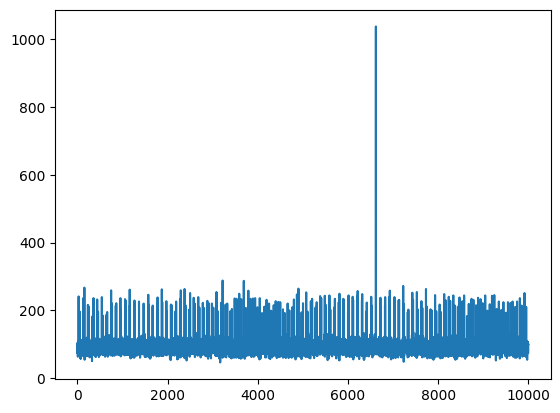

In [148]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array(list(range(len(grid_border_robots))))
ypoints = np.array(grid_border_robots)

plt.plot(xpoints, ypoints)
plt.show()